In [62]:
import pandas as pd
import numpy as np
from mlxtend.plotting import plot_decision_regions


In [63]:
df = pd.DataFrame()

In [64]:
df['x1'] = [1,2,3,4,5,6,6,7,9,9]
df['x2'] = [5,3,6,8,1,9,5,8,9,2]
df['label'] = [1,1,0,1,0,1,0,1,0,0]

In [65]:
df

,x1,x2,label
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0
5,6,9,1
6,6,5,0
7,7,8,1
8,9,9,0
9,9,2,0


<Axes: xlabel='x1', ylabel='x2'>

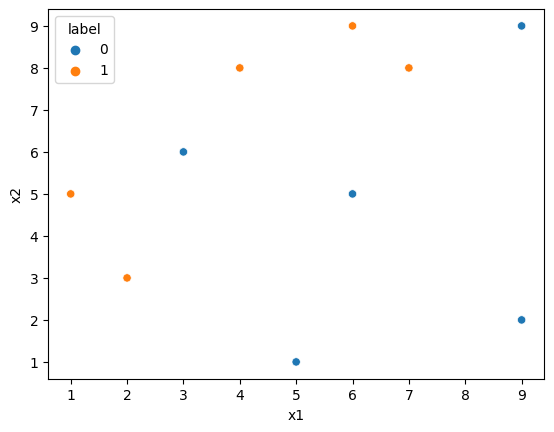

In [66]:
import seaborn as sns
sns.scatterplot(x = df['x1'],y = df.x2,hue=df.label)

In [67]:
df.shape

(10, 3)

In [68]:
df['weights'] = 1/df.shape[0]

In [69]:
df

,x1,x2,label,weights
0,1,5,1,0.1
1,2,3,1,0.1
2,3,6,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1
5,6,9,1,0.1
6,6,5,0,0.1
7,7,8,1,0.1
8,9,9,0,0.1
9,9,2,0,0.1


In [70]:
from sklearn.tree import DecisionTreeClassifier

In [71]:
dt1 = DecisionTreeClassifier(max_depth=1)

In [72]:
x = df.iloc[:,0:2].values
y = df.iloc[:,2].values

In [73]:
dt1.fit(x,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[0] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.75, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [5, 3]')]

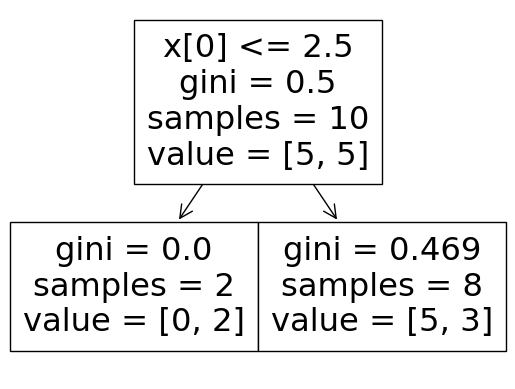

In [74]:
from sklearn.tree import plot_tree
plot_tree(dt1)

<Axes: >

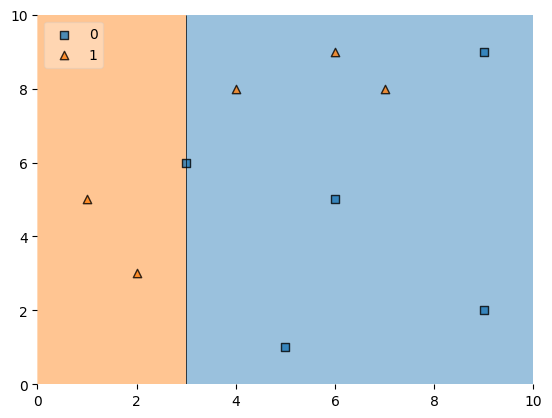

In [75]:
plot_decision_regions(x,y,clf=dt1, legend=2)

In [76]:
df['y_pred'] = dt1.predict(x)

In [77]:
df

,x1,x2,label,weights,y_pred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,0
3,4,8,1,0.1,0
4,5,1,0,0.1,0
5,6,9,1,0.1,0
6,6,5,0,0.1,0
7,7,8,1,0.1,0
8,9,9,0,0.1,0
9,9,2,0,0.1,0


In [78]:
def calculate_model_weight(error):
    return 0.5 * np.log((1-error)/(error+0.00001))

In [79]:
#step 3 calculate model weight
alpha1 = calculate_model_weight(0.3)
alpha1

0.4236322638047067

In [80]:
def update_row_weights(row,alpha= 0.423):
    if row['label'] == row['y_pred']:
        return row['weights'] * np.exp(-alpha)
    else:
        return row['weights'] * np.exp(alpha)

In [81]:
df['updated_weights'] = df.apply(update_row_weights,axis=1)

In [82]:
df

,x1,x2,label,weights,y_pred,updated_weights
0,1,5,1,0.1,1,0.065508
1,2,3,1,0.1,1,0.065508
2,3,6,0,0.1,0,0.065508
3,4,8,1,0.1,0,0.152653
4,5,1,0,0.1,0,0.065508
5,6,9,1,0.1,0,0.152653
6,6,5,0,0.1,0,0.065508
7,7,8,1,0.1,0,0.152653
8,9,9,0,0.1,0,0.065508
9,9,2,0,0.1,0,0.065508


In [83]:
df.updated_weights.sum()

0.9165153319682015

In [84]:
df['normalized_weights'] = df['updated_weights']/df['updated_weights'].sum()

In [85]:
df

,x1,x2,label,weights,y_pred,updated_weights,normalized_weights
0,1,5,1,0.1,1,0.065508,0.071475
1,2,3,1,0.1,1,0.065508,0.071475
2,3,6,0,0.1,0,0.065508,0.071475
3,4,8,1,0.1,0,0.152653,0.166559
4,5,1,0,0.1,0,0.065508,0.071475
5,6,9,1,0.1,0,0.152653,0.166559
6,6,5,0,0.1,0,0.065508,0.071475
7,7,8,1,0.1,0,0.152653,0.166559
8,9,9,0,0.1,0,0.065508,0.071475
9,9,2,0,0.1,0,0.065508,0.071475


In [86]:
df.normalized_weights.sum()

1.0

In [87]:
df['cummalativesum_upper'] = np.cumsum(df['normalized_weights'])

In [88]:
df['cummalativesum_lower'] = df['cummalativesum_upper'] - df['normalized_weights']

In [89]:
df

,x1,x2,label,weights,y_pred,updated_weights,normalized_weights,cummalativesum_upper,cummalativesum_lower
0,1,5,1,0.1,1,0.065508,0.071475,0.071475,0.000000
1,2,3,1,0.1,1,0.065508,0.071475,0.142950,0.071475
2,3,6,0,0.1,0,0.065508,0.071475,0.214425,0.142950
3,4,8,1,0.1,0,0.152653,0.166559,0.380983,0.214425
4,5,1,0,0.1,0,0.065508,0.071475,0.452458,0.380983
5,6,9,1,0.1,0,0.152653,0.166559,0.619017,0.452458
6,6,5,0,0.1,0,0.065508,0.071475,0.690492,0.619017
7,7,8,1,0.1,0,0.152653,0.166559,0.857050,0.690492
8,9,9,0,0.1,0,0.065508,0.071475,0.928525,0.857050
9,9,2,0,0.1,0,0.065508,0.071475,1.000000,0.928525


In [90]:
df[['x1','x2','label','weights','y_pred','updated_weights','cummalativesum_lower','cummalativesum_upper']]

,x1,x2,label,weights,y_pred,updated_weights,cummalativesum_lower,cummalativesum_upper
0,1,5,1,0.1,1,0.065508,0.000000,0.071475
1,2,3,1,0.1,1,0.065508,0.071475,0.142950
2,3,6,0,0.1,0,0.065508,0.142950,0.214425
3,4,8,1,0.1,0,0.152653,0.214425,0.380983
4,5,1,0,0.1,0,0.065508,0.380983,0.452458
5,6,9,1,0.1,0,0.152653,0.452458,0.619017
6,6,5,0,0.1,0,0.065508,0.619017,0.690492
7,7,8,1,0.1,0,0.152653,0.690492,0.857050
8,9,9,0,0.1,0,0.065508,0.857050,0.928525
9,9,2,0,0.1,0,0.065508,0.928525,1.000000


In [91]:
def create_new_dataest(df):
    indices = []
    for i in range(df.shape[0]):
        a = np.random.random()
        for index,row in df.iterrows():
            if row['cummalativesum_upper']> a and a> row['cummalativesum_lower']:
                indices.append(index)
    return indices

In [92]:
index_values = create_new_dataest(df)
index_values

[0, 8, 4, 4, 6, 7, 8, 7, 3, 2]

In [93]:
second_df = df.iloc[index_values,[0,1,2,3]]

In [94]:
second_df

,x1,x2,label,weights
0,1,5,1,0.1
8,9,9,0,0.1
4,5,1,0,0.1
4,5,1,0,0.1
6,6,5,0,0.1
7,7,8,1,0.1
8,9,9,0,0.1
7,7,8,1,0.1
3,4,8,1,0.1
2,3,6,0,0.1


In [95]:
dt2 = DecisionTreeClassifier(max_depth=1)

In [96]:
x = second_df.iloc[:,0:2].values
y = second_df.iloc[:,2].values

In [97]:
dt2.fit(x,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[1] <= 7.0\ngini = 0.48\nsamples = 10\nvalue = [6, 4]'),
 Text(0.25, 0.25, 'gini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(0.75, 0.25, 'gini = 0.48\nsamples = 5\nvalue = [2, 3]')]

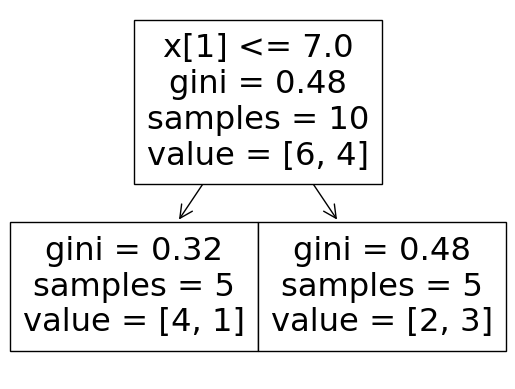

In [98]:
plot_tree(dt2)

<Axes: >

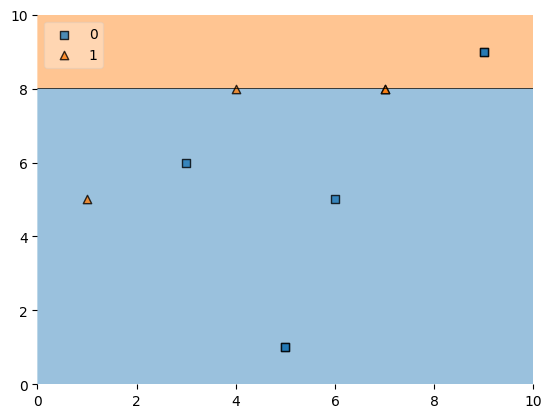

In [99]:
plot_decision_regions(x,y,clf=dt2,legend=2)

In [100]:
second_df['y_pred'] = dt2.predict(x)

In [101]:
second_df

,x1,x2,label,weights,y_pred
0,1,5,1,0.1,0
8,9,9,0,0.1,1
4,5,1,0,0.1,0
4,5,1,0,0.1,0
6,6,5,0,0.1,0
7,7,8,1,0.1,1
8,9,9,0,0.1,1
7,7,8,1,0.1,1
3,4,8,1,0.1,1
2,3,6,0,0.1,0


In [130]:
alpha2 = calculate_model_weight(0.3)

In [131]:
alpha2

0.4236322638047067

In [132]:
def update_row_weights(row,alpha=1.09):
  if row['label'] == row['y_pred']:
    return row['weights'] * np.exp(-alpha)
  else:
    return row['weights'] * np.exp(alpha)

In [133]:
second_df['updated_weights'] = second_df.apply(update_row_weights,axis=1)

In [134]:
second_df

,x1,x2,label,weights,y_pred,updated_weights,normalized_weights,cummalativesum_upper,cummalativesum_lower
0,1,5,1,0.1,0,0.297427,0.263762,0.263762,0.000000
8,9,9,0,0.1,1,0.297427,0.263762,0.527525,0.263762
4,5,1,0,0.1,0,0.033622,0.029816,0.557341,0.527525
4,5,1,0,0.1,0,0.033622,0.029816,0.587157,0.557341
6,6,5,0,0.1,0,0.033622,0.029816,0.616973,0.587157
7,7,8,1,0.1,1,0.033622,0.029816,0.646789,0.616973
8,9,9,0,0.1,1,0.297427,0.263762,0.910552,0.646789
7,7,8,1,0.1,1,0.033622,0.029816,0.940368,0.910552
3,4,8,1,0.1,1,0.033622,0.029816,0.970184,0.940368
2,3,6,0,0.1,0,0.033622,0.029816,1.000000,0.970184


In [135]:
second_df['normalized_weights'] = second_df['updated_weights']/second_df['updated_weights'].sum()

In [136]:
second_df

,x1,x2,label,weights,y_pred,updated_weights,normalized_weights,cummalativesum_upper,cummalativesum_lower
0,1,5,1,0.1,0,0.297427,0.263762,0.263762,0.000000
8,9,9,0,0.1,1,0.297427,0.263762,0.527525,0.263762
4,5,1,0,0.1,0,0.033622,0.029816,0.557341,0.527525
4,5,1,0,0.1,0,0.033622,0.029816,0.587157,0.557341
6,6,5,0,0.1,0,0.033622,0.029816,0.616973,0.587157
7,7,8,1,0.1,1,0.033622,0.029816,0.646789,0.616973
8,9,9,0,0.1,1,0.297427,0.263762,0.910552,0.646789
7,7,8,1,0.1,1,0.033622,0.029816,0.940368,0.910552
3,4,8,1,0.1,1,0.033622,0.029816,0.970184,0.940368
2,3,6,0,0.1,0,0.033622,0.029816,1.000000,0.970184


In [137]:
second_df.normalized_weights.sum()

1.0

In [138]:
second_df['cummalativesum_upper'] = np.cumsum(second_df['normalized_weights'])

In [139]:
second_df['cummalativesum_lower'] = second_df['cummalativesum_upper'] - second_df['normalized_weights']

In [140]:
second_df[['x1','x2','label','weights','y_pred','normalized_weights','cummalativesum_lower','cummalativesum_upper']]

,x1,x2,label,weights,y_pred,normalized_weights,cummalativesum_lower,cummalativesum_upper
0,1,5,1,0.1,0,0.263762,0.000000,0.263762
8,9,9,0,0.1,1,0.263762,0.263762,0.527525
4,5,1,0,0.1,0,0.029816,0.527525,0.557341
4,5,1,0,0.1,0,0.029816,0.557341,0.587157
6,6,5,0,0.1,0,0.029816,0.587157,0.616973
7,7,8,1,0.1,1,0.029816,0.616973,0.646789
8,9,9,0,0.1,1,0.263762,0.646789,0.910552
7,7,8,1,0.1,1,0.029816,0.910552,0.940368
3,4,8,1,0.1,1,0.029816,0.940368,0.970184
2,3,6,0,0.1,0,0.029816,0.970184,1.000000


In [141]:
second_df

,x1,x2,label,weights,y_pred,updated_weights,normalized_weights,cummalativesum_upper,cummalativesum_lower
0,1,5,1,0.1,0,0.297427,0.263762,0.263762,0.000000
8,9,9,0,0.1,1,0.297427,0.263762,0.527525,0.263762
4,5,1,0,0.1,0,0.033622,0.029816,0.557341,0.527525
4,5,1,0,0.1,0,0.033622,0.029816,0.587157,0.557341
6,6,5,0,0.1,0,0.033622,0.029816,0.616973,0.587157
7,7,8,1,0.1,1,0.033622,0.029816,0.646789,0.616973
8,9,9,0,0.1,1,0.297427,0.263762,0.910552,0.646789
7,7,8,1,0.1,1,0.033622,0.029816,0.940368,0.910552
3,4,8,1,0.1,1,0.033622,0.029816,0.970184,0.940368
2,3,6,0,0.1,0,0.033622,0.029816,1.000000,0.970184


In [142]:
index_values = create_new_dataest(second_df)

In [143]:
index_values

[8, 0, 8, 8, 4, 8, 0, 8, 8, 4]

In [144]:
thrid_df = second_df.iloc[index_values,[0,1,2,3]]

In [145]:
thrid_df

,x1,x2,label,weights
3,4,8,1,0.1
0,1,5,1,0.1
3,4,8,1,0.1
3,4,8,1,0.1
6,6,5,0,0.1
3,4,8,1,0.1
0,1,5,1,0.1
3,4,8,1,0.1
3,4,8,1,0.1
6,6,5,0,0.1


In [146]:
dt3 = DecisionTreeClassifier(max_depth=1)
x = thrid_df.iloc[:,0:2].values
y = thrid_df.iloc[:,2].values

dt3.fit(x,y)

DecisionTreeClassifier(max_depth=1)

<Axes: >

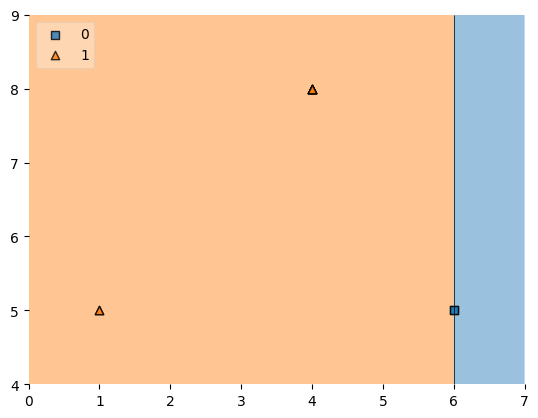

In [147]:
plot_decision_regions(x,y,clf=dt3,legend=2)

In [148]:
thrid_df['y_pred'] = dt3.predict(x)

In [149]:
thrid_df

,x1,x2,label,weights,y_pred
3,4,8,1,0.1,1
0,1,5,1,0.1,1
3,4,8,1,0.1,1
3,4,8,1,0.1,1
6,6,5,0,0.1,0
3,4,8,1,0.1,1
0,1,5,1,0.1,1
3,4,8,1,0.1,1
3,4,8,1,0.1,1
6,6,5,0,0.1,0


In [151]:
alpha3 = calculate_model_weight(0)
alpha3

5.756462732485114

In [152]:
print(alpha1,alpha2,alpha3)

0.4236322638047067 0.4236322638047067 5.756462732485114


In [153]:
query = np.array([1,5]).reshape(1,2)
dt1.predict(query)

array([1], dtype=int64)

In [154]:
dt2.predict(query)

array([0], dtype=int64)

In [155]:
dt3.predict(query)

array([1], dtype=int64)

In [156]:
alpha1*1 + alpha2*0 + alpha3* 1

6.180094996289821

In [157]:
np.sign(6.18)

1.0